# Telco Churn Classification Project

# Randy French

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import acquire
import prepare

In [2]:
df = acquire.get_telco_data()

In [3]:
df.shape

(7043, 24)

In [4]:
# geta view of the columns and contents
df.head(3)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,Mailed check,DSL
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,Credit card (automatic),DSL
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,Bank transfer (automatic),DSL


In [5]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# Get summary statistics for numeric columns.
df.describe()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,2.315633,1.690473,0.162147,32.371149,64.761692
std,0.737796,1.148907,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,2.000000,3.000000,2.000000,0.000000,55.000000,89.850000
max,3.000000,4.000000,3.000000,1.000000,72.000000,118.750000


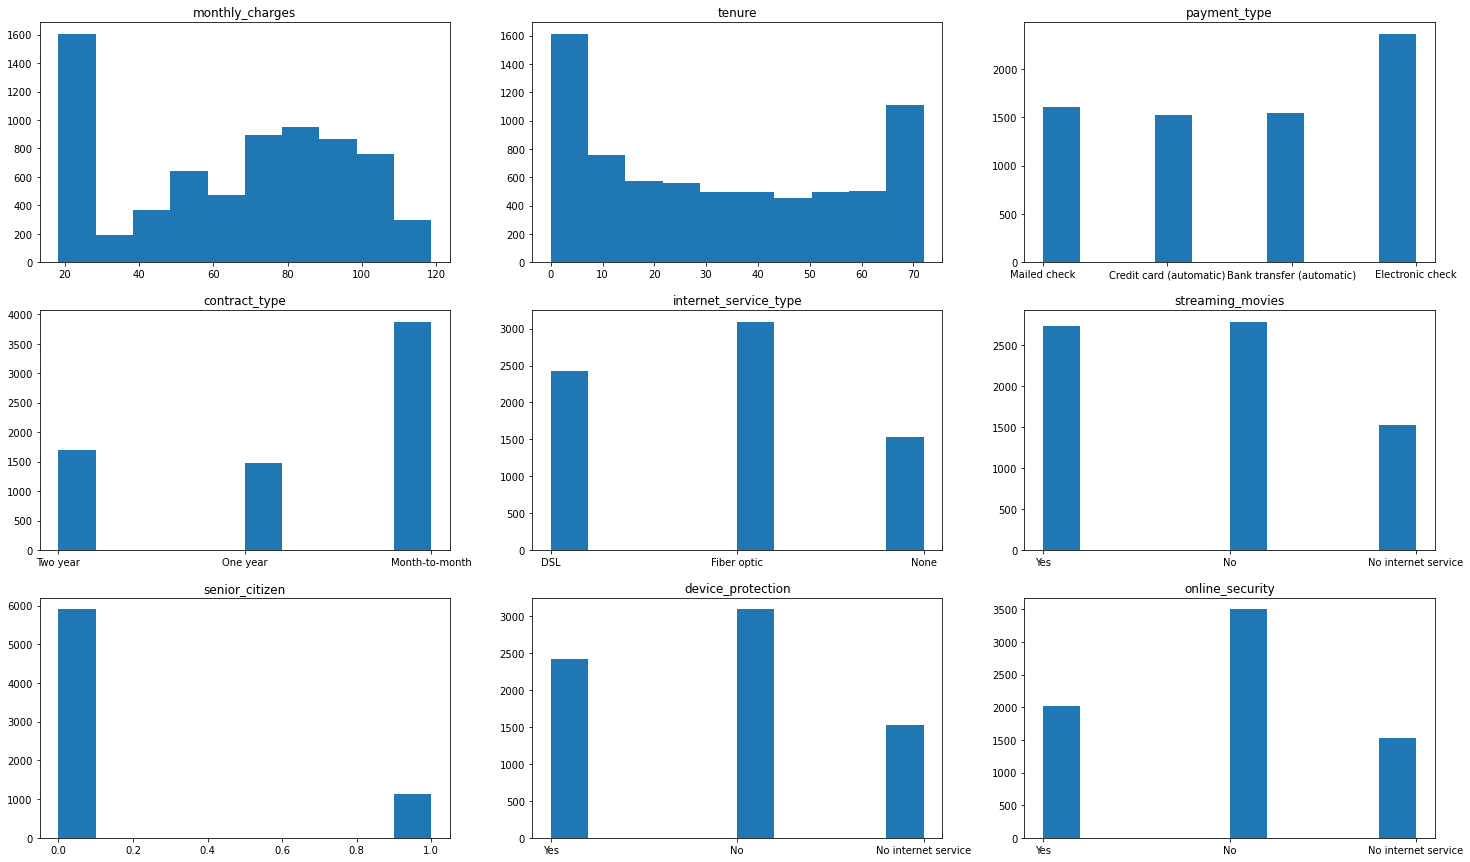

In [7]:
# Check out distributions of numberic columns with subplots of histograms of features

# sets size
plt.subplots(figsize=(25, 15))

plt.subplot(3,3,1);
line1 = plt.hist(df.monthly_charges)
plt.title('monthly_charges');

plt.subplot(3,3,2);
line2 = plt.hist(df.tenure);
plt.title('tenure');

plt.subplot(3,3,3);
line3 = plt.hist(df.payment_type);
plt.title('payment_type');

plt.subplot(3,3,4);
line4 = plt.hist(df.contract_type);
plt.title('contract_type');

plt.subplot(3,3,5);
line1 = plt.hist(df.internet_service_type)
plt.title('internet_service_type');

plt.subplot(3,3,6);
line2 = plt.hist(df.streaming_movies);
plt.title('streaming_movies');

plt.subplot(3,3,7);
line3 = plt.hist(df.senior_citizen);
plt.title('senior_citizen');

plt.subplot(3,3,8);
line4 = plt.hist(df.device_protection);
plt.title('device_protection');

plt.subplot(3,3,9);
line4 = plt.hist(df.online_security);
plt.title('online_security');

In [8]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

0708-SJDIS    1
3096-GKWEB    1
9348-ROUAI    1
4277-PVRAN    1
7733-UDMTP    1
             ..
2245-ADZFJ    1
1162-ECVII    1
4789-KWMXN    1
6374-NTQLP    1
2451-YMUXS    1
Name: customer_id, Length: 7043, dtype: int64
0708-SJDIS    0.000142
3096-GKWEB    0.000142
9348-ROUAI    0.000142
4277-PVRAN    0.000142
7733-UDMTP    0.000142
                ...   
2245-ADZFJ    0.000142
1162-ECVII    0.000142
4789-KWMXN    0.000142
6374-NTQLP    0.000142
2451-YMUXS    0.000142
Name: customer_id, Length: 7043, dtype: float64
----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Nam

In [9]:
#Transpose the data for a different view
df.head().T

,0,1,2,3,4
internet_service_type_id,1,1,1,1,1
payment_type_id,2,4,3,4,3
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [10]:
#df.isna().sum()
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [11]:
df.tenure.value_counts(bins=5, sort=False)

(-0.073, 14.4]    2371
(14.4, 28.8]      1126
(28.8, 43.2]       989
(43.2, 57.6]       947
(57.6, 72.0]      1610
Name: tenure, dtype: int64

In [12]:
df = df.drop_duplicates()
df.shape

(7043, 24)

In [13]:
df.total_charges.str.contains("")

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: total_charges, Length: 7043, dtype: bool

In [25]:
df.total_charges.value_counts()

20.20      11
19.75       9
19.65       8
19.90       8
20.05       8
           ..
6383.35     1
775.30      1
6841.30     1
75.70       1
5867.00     1
Name: total_charges, Length: 6530, dtype: int64

In [24]:
#find any missing values
df.total_charges.value_counts()

20.20      11
19.75       9
19.65       8
19.90       8
20.05       8
           ..
6383.35     1
775.30      1
6841.30     1
75.70       1
5867.00     1
Name: total_charges, Length: 6530, dtype: int64

In [28]:
#this shows me each row where the total_charges column have a missing vlaue
df[df['total_charges'].str.contains('')]

AttributeError: Can only use .str accessor with string values!

In [15]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [16]:
1869/7043

0.2653698707936959

In [17]:
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [18]:
1142/7043

0.1621468124378816

In [29]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,online services,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0016-QLJIS,1,2,3,0,0,1,1,65,1,1,...,1,1,90.45,5957.90,0,2,0,DSL,2,2
0017-DINOC,1,4,3,1,0,0,0,54,0,0,...,1,0,45.20,2460.55,0,2,1,DSL,1,1
0019-GFNTW,1,3,3,0,0,0,0,56,0,0,...,1,0,45.05,2560.10,0,2,1,DSL,2,0
0056-EPFBG,1,4,3,1,0,1,1,20,0,0,...,1,1,39.40,825.40,0,2,1,DSL,1,0
0078-XZMHT,1,3,3,1,0,1,0,72,1,1,...,1,1,85.15,6316.20,0,2,1,DSL,1,2


# Data Preparation

In [19]:
df = prepare.prep_telco_data(df)

In [20]:
df.head(3)

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,online services,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0016-QLJIS,1,2,3,0,0,1,1,65,1,1,...,1,1,90.45,5957.90,0,2,0,DSL,2,2
0017-DINOC,1,4,3,1,0,0,0,54,0,0,...,1,0,45.20,2460.55,0,2,1,DSL,1,1
0019-GFNTW,1,3,3,0,0,0,0,56,0,0,...,1,0,45.05,2560.10,0,2,1,DSL,2,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7032 non-null   int64  
 1   payment_type_id           7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   int64  
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   int64  
 6   dependents                7032 non-null   int64  
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   int64  
 9   multiple_lines            7032 non-null   int64  
 10  device_protection         7032 non-null   int64  
 11  tech_support              7032 non-null   int64  
 12  paperless_billing         7032 non-null   int64  
 13  monthly_charges           7032 non-null   float64
 14

([<matplotlib.axis.XTick at 0x7fe7e03a4340>,
 [Text(0, 0, ''), Text(0, 0, '')])

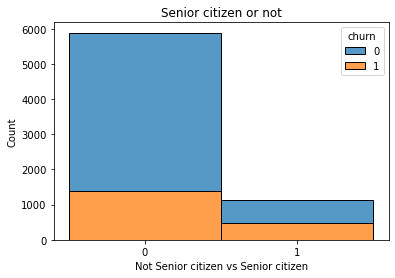

In [22]:
sns.histplot(df,
             x=df.senior_citizen,
             hue='churn',
             multiple='stack',
             discrete=True)

plt.title("Senior citizen or not")
plt.xlabel('Not Senior citizen vs Senior citizen')

plt.xticks(np.arange(df.senior_citizen.min(), df.senior_citizen.max()+1, 1.0))

In [31]:
telco_correl = df.corr()
telco_correl

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,online services,streaming_services
internet_service_type_id,1.000000,0.008851,0.099579,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,-0.305757,-0.388535,-0.138166,-0.322173,-0.175691,-0.047097,0.099579,-0.040351,-0.439311,-0.280652
payment_type_id,0.008851,1.000000,0.359487,-0.004928,-0.093712,0.133280,0.124002,0.340939,-0.003106,0.036009,0.110953,0.167189,-0.101790,-0.074640,0.222694,-0.262918,0.359487,0.902613,0.160660,-0.010554
contract_type_id,0.099579,0.359487,1.000000,0.000095,-0.141820,0.294094,0.240556,0.676734,0.003019,0.107529,0.219648,0.293967,-0.175475,-0.072739,0.450306,-0.396150,1.000000,0.331931,0.248802,0.121811
gender,-0.002236,-0.004928,0.000095,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.000807,-0.008507,-0.011902,-0.013779,0.000048,-0.008545,0.000095,-0.011974,-0.018311,-0.009840
senior_citizen,-0.032160,-0.093712,-0.141820,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541,-0.141820,-0.033775,0.019169,0.128654
partner,0.000513,0.133280,0.294094,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982,0.294094,0.161327,0.177964,0.138524
dependents,0.044030,0.124002,0.240556,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128,0.240556,0.094464,0.064279,-0.031346
tenure,-0.029835,0.340939,0.676734,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049,0.676734,0.396772,0.430783,0.323016
phone_service,0.387266,-0.003106,0.003019,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691,0.003019,0.001159,-0.089133,-0.031333
multiple_lines,0.011346,0.036009,0.107529,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.201733,0.100421,0.163746,0.490912,0.469042,0.040033,0.107529,0.113030,0.189355,0.295223


In [32]:
telco_correl_churn = telco_correl['churn'].sort_values(ascending=False)
telco_correl_churn

churn                       1.000000
monthly_charges             0.192858
paperless_billing           0.191454
senior_citizen              0.150541
streaming_services          0.070872
multiple_lines              0.040033
phone_service               0.011691
gender                     -0.008545
internet_service_type_id   -0.047097
device_protection          -0.066193
partner                    -0.149982
online services            -0.156868
dependents                 -0.163128
tech_support               -0.164716
total_charges              -0.199484
payment_type               -0.210420
payment_type_id            -0.262918
tenure                     -0.354049
contract_type_id           -0.396150
contract_type              -0.396150
Name: churn, dtype: float64